# Degradação na Amazônia
## EPGE - FGV
### Autor: Robert Kenedy Dourado

## 1. Introdução
No último ano, o número de compartilhamentos e a mobilização da população em relação à questões ambientais e, sobretudo, o desmatamento e as queimadas na amazônia tem aumentado bastante. 

Todo esse aumento tem seus pilares. Desde o início dos registros do deflorestamento, em 1988, a amazônia é severamente explorada, em geral pela expansão da agropecuária. Desde então, até 2019, cerca de 450.000 $km^2$ foram desmatados, o que equivale à aproximadamente 8% da área total da amazônia. Ou seja, se esse comportamento fosse mantido, em 382 anos a amazônia seria completamente desmatada.

Além disso, como veremos adiante, existe uma tendência de aumento na taxa de desmatamento nos últimos anos, o que poderia fazer com o tempo necessário para destruição total da amazônia legal fosse ainda menor.

Dito isso, o objetivo desse trabalho é tentar compreender como a exploração desse bioma se comportou ao longo dos anos, e o que justificou eventuais aumentos observados na série histórica.

Ademais, será analisado como as queimadas e focos de incêndio ocorreram na região a partir de 1998, ano de início da coleta de dados. Será observado também qual a relação das queimadas e o desmatamento na região.

In [ ]:
#instalando bibliotecas não nativas
!pip install --upgrade geopandas
!pip install --upgrade unidecode

In [ ]:
#importando as bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns
import geopandas as gpd
from unidecode import unidecode

In [ ]:
#bibliotecas específicas do google colab

from google.colab import drive
import os

In [ ]:
#permitindo o acesso dos dados direto do google drive
os.getcwd()
drive.mount('/content/gdrive')
os.chdir('gdrive/My Drive/Carreira/FGV/8° Período/Introdução à Ciencia de Dados com Python/Colab Notebooks/RobertDourado/Trabalho A2/Datas')

Mounted at /content/gdrive


## 2. Desmatamento
Os dados sobre as taxas anuais de desmatamento foram obtidos através do site [Terra Brasilis](http://terrabrasilis.dpi.inpe.br/sobre/), que é uma plataforma web desenvolvida pelo INPE para acesso, consulta, análise e disseminação de dados geográficos gerados pelos projetos de monitoramento da vegetação nativa do instituto como o [PRODES](http://www.obt.inpe.br/OBT/assuntos/programas/amazonia/prodes)  e o [DETER](http://www.obt.inpe.br/OBT/assuntos/programas/amazonia/deter/deter).

O projeto PRODES (Programa de Monitoramento da Floresta Amazônica Brasileira por Satélite), é quem tem feito o monitoramento desde 1988.
O PRODES conta imagens obtidas através de diversos satelites, buscando minimizar o problema da cobertura de nuvens e realizando estimativas de extrema confiança, possuindo reconhecimento por cientistas nacionais e internacionais. Os dados obtidos pelo PRODES passaram a ser disponibilizados para os usuários a partir de 2004, através da adoção da política de transparência dos dados do monitoramento do estado da floresta pelo INPE e pelo governo federal.


**Amazônia Legal**

A amazônia legal corresponde a 61% de todo o território brasileiro, e além de envolver todo o bioma Amazônia, compreende também parte do Cerrado e do pantanal do Mato Grosso, englobando a maior parte da região norte do país e parte da região nordeste.

A nossa base de dados possui valores anuais do nível de desmatamento por estado, desde 1988 até 2019. 



###2.1 Limpeza dos dados

In [ ]:
#carregando o dataset, já realizando alguma limpeza dos dados
desmatamento = pd.read_csv('terrabrasilis_legal_amazon_desm anual_estado.csv',sep=';'
                                    ).rename(columns={'area km²':'area','uf':'state'}
                                    ).sort_values('year',ignore_index = True)

#acrescentando uma nova coluna com o percentual de mudança da área desmatada de um ano para o outro, por estado
desmatamento = pd.merge(desmatamento,
                        desmatamento.groupby(['state','year']).sum().pct_change().reset_index().rename(columns={'area':'pct_change'}),
                                                                                                       on=['year', 'state'])

for i in range(0,len(desmatamento)):   #leve ajuste
  if desmatamento.year[i] == 1988:
    desmatamento['pct_change'][i] = np.nan

#padronizando os nomes dos estados
desmatamento['state'] = desmatamento['state'].apply(lambda x : unidecode(x.upper()))

#vizualização do dataset
desmatamento.tail(2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,area,state,pct_change
280,2019,32,AMAPA,0.333333
281,2019,4172,PARA,0.520408


---
**OBS:** Por alguma razão o código 
```python
desmatamento.loc[desmatamento['year']==1988].loc[:,('pct_change')]=np.nan
```
não permitiu que eu atribuísse o valor `np.nan`onde eu queria. O _output_ diz 
que eu estou tentando configurar um valor em uma cópia de um _slice_ do _DataFrame_, mas eu não consegui por nenhum outro método.


---

###2.2 Desmatamento anual 
Com o nosso _dataset_ pronto, eu gostaria de analisar como a área desmatada se comportou ao longo dos anos desde o início dos registros, e também como ela ocorreu dentro dos estados.

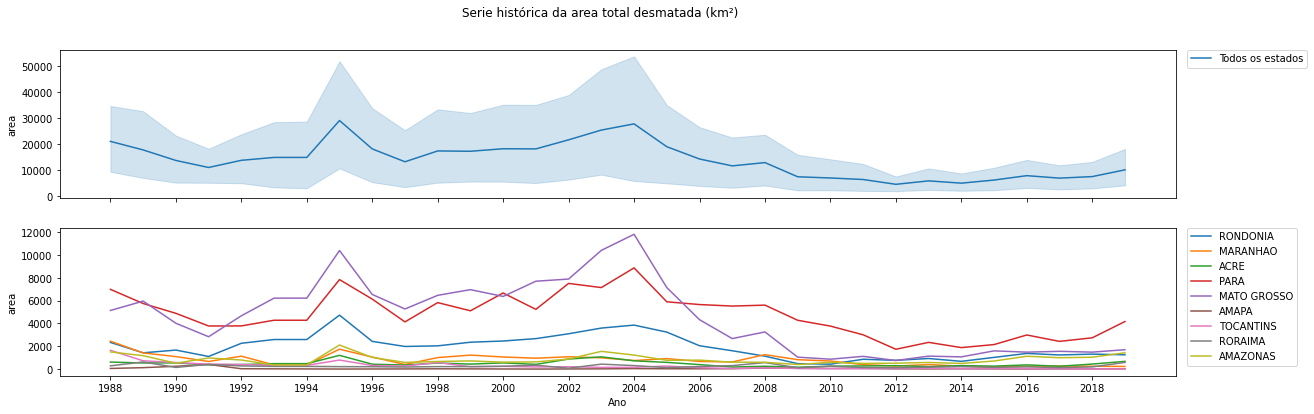

In [ ]:
#subplots
fig, [ax1, ax2] = plt.subplots(nrows=2, sharex=True, sharey=False, figsize=(20, 6))

#plot1
sns.lineplot(data = desmatamento, x = 'year',y ='area', estimator='sum', ax = ax1)

#plot2
sns.lineplot(data = desmatamento, x = 'year',y ='area', hue='state', ax = ax2)

#labels
plt.xticks(range(1988,2020,2))
plt.xlabel('Ano')
fig.suptitle('Serie histórica da area total desmatada (km²)')
ax1.legend(['Todos os estados'],bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
ax2.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)

plt.show()

Através do nosso gráfico, podemos observar que tivemos picos de desmatamento nos anos de 1995 e 2004 tanto no agregado como no intraestado. Também não é dificil notar que os estados que mais "contribuíram" para a área total desmatada foram o Mato Grosso, Pará e Rondônia.

De acordo com o estudo "Deflorestamento 1995-1997" disponibilizado pelo INPE, a principal causa do desmatamento provocado nessa região é a conversão da floresta para produção de pastagens e lavouras temporárias. As estatísticas apontam que houve um crescimento da área utilizada para grãos e uma expansão significativa para criação de gado bovino. As maiores extensões se deram exatamente nos 3 estados citados acima, e o estado de Tocantins.

Além disso, o estudo faz um adendo sobre um levantamento feito pela Fundação Getúlio Vargas, que diz que em 1996 e 1997 houve uma grande desvalorização do preço da terra em todo o país, mas principalmente na região Norte.

Em relação ao biênio 2004-2005, um relatório divulgado em junho de 2014 em uma reunião da ONU sobre mudanças climáticas, destaca que o alto nível de desmatamento naquele ano foi impulsionado pela expansão na produção de soja e carnes também, embora tenha havido uma tendência de queda a seguir mesmo com uma elevação nos preços das commodities.

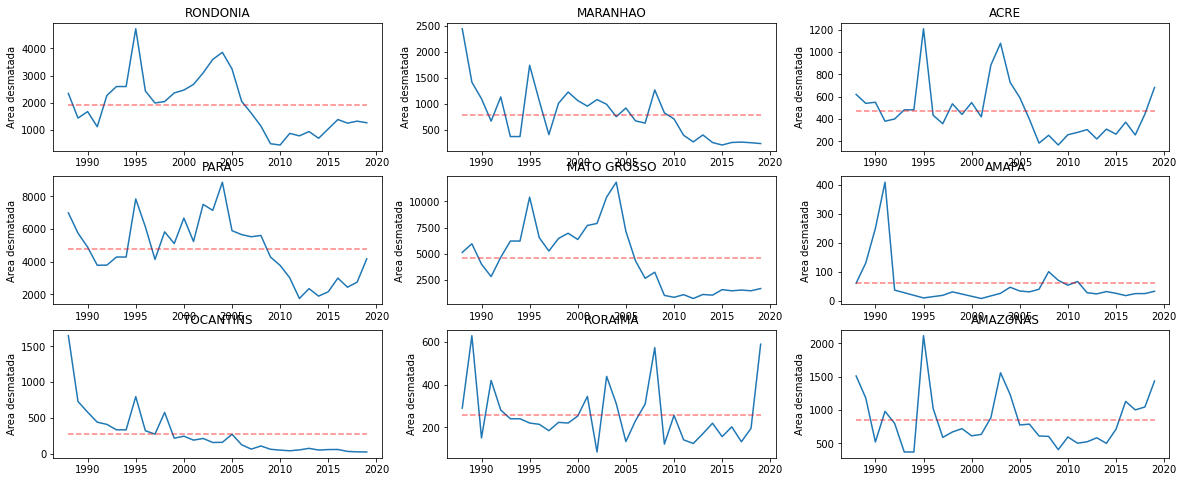

In [ ]:
#plot
plt.figure(figsize=(20,8))

#subplots
k = 1
for i in desmatamento['state'].unique():
  plt.subplot(3,3,k)
  sns.lineplot(data = desmatamento.loc[desmatamento['state'] == i], x = 'year',y ='area')      #chart
  plt.plot(range(1988,2020),[desmatamento.loc[desmatamento['state'] == i]['area'].mean()]*32,'r--', alpha = 0.5)    #chart2
  #plt.ylim([0,12500])
  plt.title(i)                         #título
  plt.xlabel('')                       #rótulo eixo x
  plt.ylabel('Area desmatada')         #rótulo eixo y
  k += 1

plt.show()

A partir dos gráficos acima, podemos perceber que estados como Maranhão, Amapa e Tocantins apresentam uma tendência de diminuição nas suas taxas de desmatamento, enquanto Mato Grosso e Rondônia aparentam terem as estabilizado em um patamar mais baixo.
Contudo, estados como Acre, Pará, Roraima e Amazonas tem mostrado um crescimento abrupto nos últimos anos. O gráfico a seguir nos mostra mais detalhadamente como foi a ocorrência de desmatamentos nos últimos 10 anos.

Isso sugere que o desmatamento está migrando de estados já muito explorados como o Mato Grosso em direção à estados ainda pouco explorados, como Pará.

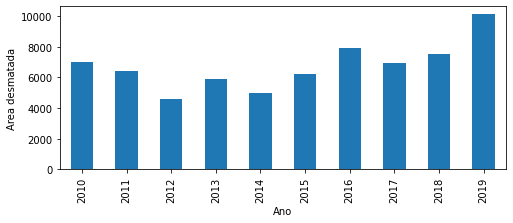

In [ ]:
#plot
plt.figure(figsize=(8,3))
desmatamento.groupby('year').sum()['area'].loc[2010:2020].plot.bar()

#labels
plt.xlabel('Ano')
plt.ylabel('Area desmatada')

plt.show()

Note que é possível estabelecer uma tendência de crescimento agregado no desmatamento da amazônia legal a partir de 2012, quando o nível de desmatamento atinge seu mínimo desde que a atividade passou a ser monitorada. 

O jornal Folha de São Paulo aborda a política como uma das causas desse aumento. Segundo o pesquisador da UFMG, Raoni Rajão, as altas taxas registradas recentemente podem ter origens no Governos Dilma e a crescente influência do agronegócio no Congresso. Ele afirma que a ex-presidenta não deu prioridade à questão ambiental, e Temer também começou a ceder a uma série de pressões.

Além disso, a própria publicação menciona que o discurso do atual presidente Jair Bolsonaro tem impacto sobre o atual nível de deflorestamento. Durante a campanha, o presidente teria criticado órgãos de fiscalização e cogitado fundir o Ministério do Meio Ambiente com o da Agricultura, embora tenha recuado em seguida. Ainda depois de eleito, continuou a criticar o Ibama e a confiabilidade nos dados produzidos pelo INPE, além de outras medidas como a paralização do Fundo Amazônia. Contudo, o próprio jornal reconhece a existência dessa tendência no aumento da area deflorestada desde o início da década.



### 2.3 Visualização no mapa
Em seguida, gostaria de olhar em quais estados se concentrou esses 3 picos de desmatamento na nossa séria histórica, ou seja, os anos de 1995, 2004, e o caso mais recente e ainda em suposto crescimento, o ano de 2019. Para nossa análise, será necessário carregarmos uma nova base de dados, disponibilizada pelo [IBGE](https://www.ibge.gov.br/) em:
> Geociências$\rightarrow$ Cartas e Mapas$\rightarrow$ Bases cartográfias contínuas
>> Bases cartográfias contínuas - Brasil
>>>Downloads
>>>>bcim
>>>>
>>>> $\hookrightarrow$versão2016
>>>>
>>>>>$\hookrightarrow$geopackage 



In [ ]:
#carregando a base de dados, já selecionando as colunas de interesse e renomeando-as
infos_uf = gpd.read_file('bcim_2016_21_11_2018.gpkg',layer = 'lim_unidade_federacao_a').loc[:,['nome','geometry','sigla']].rename(columns={'nome':'state'})

#uniformizando os valores da coluna
infos_uf['state'] = infos_uf['state'].apply(lambda x : unidecode(x.upper()))

#visualização do dataset
infos_uf.head(2)

/usr/local/lib/python3.6/dist-packages/geopandas/geodataframe.py:422: RuntimeWarning:

Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.



,state,geometry,sigla
0,GOIAS,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743...",GO
1,MATO GROSSO DO SUL,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159...",MS


In [ ]:
#adicionando os dados ao nosso antigo dataset
desmatamento = pd.merge(desmatamento,infos_uf, on ='state')
desmatamento = gpd.GeoDataFrame(desmatamento)

In [ ]:
df = desmatamento.loc[(desmatamento['year'] == 1995)]
df['area'].max()

10391

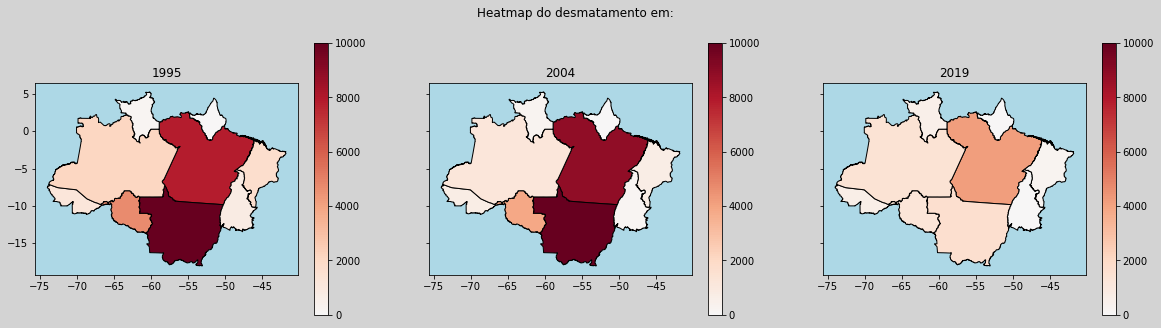

In [ ]:
#padronizando as escalas
same_scale = True
from matplotlib.colors import TwoSlopeNorm
norm = TwoSlopeNorm(vmin=0, vmax=10000, vcenter=000.1)

#lista com os anos de pico
l = [1995,2004,2019]

#plot
fig, [ax1, ax2, ax3] = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(20, 5))
fig.suptitle('Heatmap do desmatamento em:')
fig.set_facecolor('lightgrey')

#subplots
for i in range(0,3,1):
  ax = [ax1, ax2, ax3][i]
  df = desmatamento.loc[(desmatamento['year'] == l[i])] 
  df.plot(column = 'area',
                cmap='RdBu_r' if same_scale else 'Reds', 
                legend = True,
                edgecolor='black',
                ax = ax,
                norm = norm if same_scale else TwoSlopeNorm(vmin=0, vmax=df['area'].max(), vcenter=df['area'].max()/2)
                )
  ax.set_title(str(l[i]))
  ax.set_facecolor('lightblue')

plt.show()

Podemos notar que em 1995 e 2004, os estados de Mato Grosso, Roraima e Pará se destacam no nível de desmatamento em relação aos demais estados. Enquanto que me 2019, a área deflorestada está mais distribuída, embora a posição de estado que mais teve sua área desmatada tenha saído do Mato Grosso e ido para o Pará. Esse fato se deve a expansão da fronteira agrícola, pois como já houve uma intensa exploração no estado do Mato Grosso, novas regiões são desmatadas para a expansão do negócio.

## 3. Queimadas

Para os dados sobre as queimadas, eu utilizei o [Programa Queimadas](http://queimadas.dgi.inpe.br/queimadas/portal), que é um portal de monitoramento referente as queimadas e incêndios florestais, disponibilizado pelo INPE.
Ele inclui o monitoramento operacional de focos de fogo ativos de queimadas e de incêndios florestais detectados por satélites, e o cálculo e previsão do risco de fogo da vegetação, além do mapeamento das cicatrizes de Área Queimada.




###3.1 Dados
Os nossos dados consistem no número agregado de focos de incêndio mensais dos estados que fazem parte da Amazônia Legal, mas não necessariamente a região representada por ela, ou seja, são informações dos estados como um todo.

O _download_ dos arquivos foi realizado um a um por estado através deste [link](http://queimadas.dgi.inpe.br/queimadas/portal-static/estatisticas_estados/). A limpeza e união dos arquivos em único _dataset_ é realizado a seguir.

In [ ]:
#Carregando a primeira base de dados referente ao estado do amazonas,
#realizando já alguma limpeza como remoção de linhas e renomeamento de colunas
queimadas = pd.read_csv('historico_estado_amazonas.csv').rename(columns={'Unnamed: 0':'year'}).drop({23,24,25})

#padronizando os nomes das colunas 
queimadas.columns = pd.Series(queimadas.columns).apply(lambda x : x.lower())

#removendo a coluna com o a soma anual de focos de incêndio
queimadas = queimadas.drop(columns = {'total'})

#"transpondo" o dataset, de forma que a manipulação dos dados se torne mais fácil 
queimadas = queimadas.melt(id_vars=['year'],
               var_name='month',
               value_name = 'focos').sort_values('year',ignore_index = True)

#criando uma nova coluna categorica que informa qual estado estamos trabalhando
queimadas['state'] = 'AMAZONAS'

#vizualizando o dataset
queimadas.head()

,year,month,focos,state
0,1998,janeiro,-,AMAZONAS
1,1998,junho,2,AMAZONAS
2,1998,outubro,82,AMAZONAS
3,1998,abril,-,AMAZONAS
4,1998,março,-,AMAZONAS


A opção por realizar o trabalho com um primeiro estado foi intencional, pois a partir de agora estabelecemos um método que poderá ser aplicado às outras bases de dados dos outros estados, concatenando umas às outras "por baixo".

In [ ]:
#aplicando a metodologia acima a todas as bases de dados de todos os estados e os concatenando
for i in ['RONDÔNIA', 'MARANHÃO', 'ACRE', 'PARÁ', 'MATO GROSSO', 'AMAPÁ','TOCANTINS', 'RORAIMA']:
  suporte = pd.read_csv(
      'historico_estado_' + unidecode(i.lower().replace(' ','_')) + '.csv'
      ).rename(
          columns={'Unnamed: 0':'year'}
          ).drop(
              {23,24,25}
              )
  suporte.columns = pd.Series(suporte.columns).apply(lambda x : x.lower())
  suporte = suporte.drop(columns = {'total'})
  suporte = suporte.melt(id_vars=['year'],
               var_name='month',
               value_name = 'focos').sort_values('year')
  suporte['state'] = unidecode(i)
  queimadas = pd.concat([queimadas,suporte], ignore_index = True, axis=0,join ='outer')

#vizualizando o resultado final
queimadas

,year,month,focos,state
0,1998,janeiro,-,AMAZONAS
1,1998,junho,2,AMAZONAS
2,1998,outubro,82,AMAZONAS
3,1998,abril,-,AMAZONAS
4,1998,março,-,AMAZONAS
...,...,...,...,...
2479,2020,março,695,RORAIMA
2480,2020,fevereiro,483,RORAIMA
2481,2020,janeiro,297,RORAIMA
2482,2020,novembro,13,RORAIMA


Contudo, ainda é necessário que algumas manipulações sejam feitas nos dados de algumas colunas, como números que são considerados como strings e defasagem de dados que serão representados como `np.nan` 

In [ ]:
#Dados ausentes ou não observados como np.nan
queimadas['focos'][queimadas['focos'] == '-'] = np.nan

#convertendo o tipo do objeto das colunas para números
queimadas['focos'] = queimadas['focos'].astype('float')
queimadas['year'] = queimadas['year'].astype('float')
queimadas['year'] = queimadas['year'].astype('Int32')

#reordenando o dataset pra uma ordem cronológica
months = ["janeiro", "fevereiro", "março", "abril", "maio", "junho", 
          "julho", "agosto", "setembro", "outubro", "novembro", "dezembro"]
queimadas['month'] = pd.Categorical(queimadas['month'], categories=months, ordered=True)
queimadas.sort_values(['year','month'],ignore_index=True, inplace = True)
queimadas["month"] = queimadas["month"].str.capitalize()


#visualização do dataset final
queimadas.head()

,year,month,focos,state
0,1998,Janeiro,NaN,AMAZONAS
1,1998,Janeiro,NaN,RONDONIA
2,1998,Janeiro,NaN,MARANHAO
3,1998,Janeiro,NaN,ACRE
4,1998,Janeiro,NaN,PARA


###3.2 Queimadas - Análise Anual
Realizado a limpeza de nossos dados, iremos agora analisar como o número de focos de incêndio se comportou na sua série histórica.

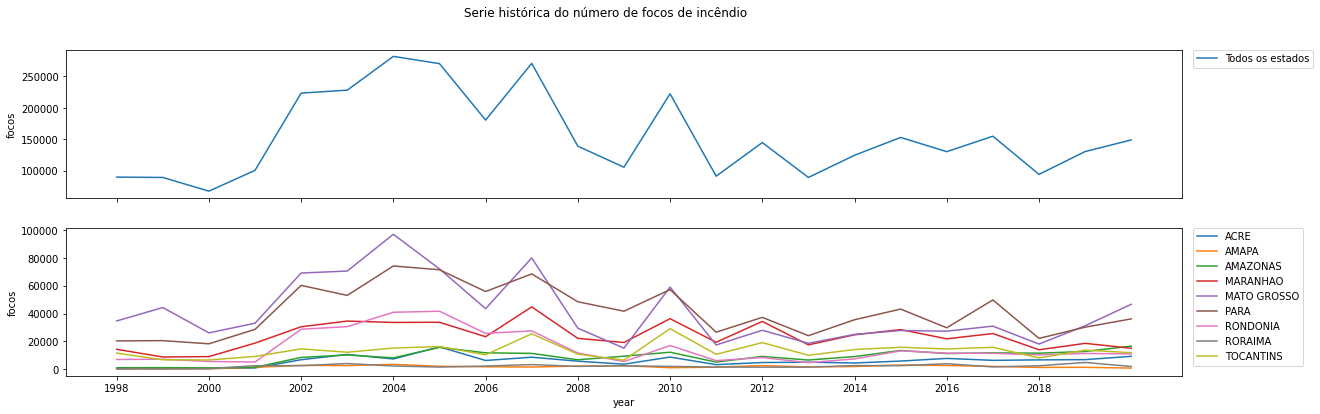

In [ ]:
#plot
fig, [ax1, ax2] = plt.subplots(nrows=2, sharex=True, sharey=False, figsize=(20, 6))

#plot1
sns.lineplot(data = queimadas, x = 'year',y ='focos', estimator='sum', ax = ax1)

#plot2
sns.lineplot(data = queimadas.groupby(['year','state']).sum().reset_index(col_fill=['year','state']),
             x = 'year', y ='focos', hue ='state', estimator = 'sum', ax = ax2)

#labels
plt.xticks(range(1998,2020,2))
fig.suptitle('Serie histórica do número de focos de incêndio')
ax1.legend(['Todos os estados'],bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
ax2.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)

plt.show()

Podemos notar que entre 2002 e 2007, e o ano de 2010, o número de queimadas parece bem acima do que o nível dos outros anos. 

Esse período de aumento de incêndios no início do milênio pode ser associado tando como um período de estiagem quanto uma das consequências da elevação na área desmatada no período, como veremos mais adiante. Enquanto o ano de 2010 pode ser considerado o ano de seca mais drástica na história da amazônia, e por se tratar de um aumento isolado, essa é a provável causa da elevação no número de casos de incêndio.

Além disso, podemos notar que não há estados que se sobressaem em número de focos de incêndios sobre os outros. Os estados que **aparentam** ter o maior número de casos de incêndio são Mato Grosso, Pará e Maranhão, nessa ordem. Em paralelo, esses 3 estados são os que mais possuem extensão territorial, nessa mesma sequência, no nosso conjunto de estados que fazem parte da Amazônia Legal, atrás apenas de Amazonas, como podemos verificar rapidamente através da seguinte base de dados, extraída do IBGE, disponível em https://www.ibge.gov.br/cidades-e-estados.

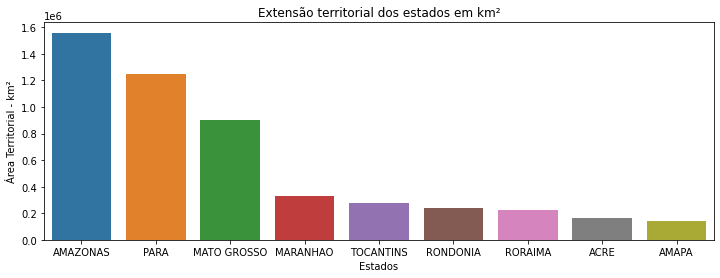

In [ ]:
#carregando o dataset e realizando alguma limpeza
df = pd.read_csv('estados_br.csv', sep=';'
                  ).loc[:,('UF','Área Territorial - km² [2019]')].rename(columns={'UF':'state','Área Territorial - km² [2019]':'territorio'})
df['state'] = df['state'].apply(lambda x : unidecode(x.upper()))

#plot
plt.figure(figsize=(12,4))
sns.barplot(data = df.loc[df['state'].isin(desmatamento['state'].unique())].sort_values('territorio',ascending = False), x = 'state', y='territorio')

#labels
plt.xlabel('Estados')
plt.ylabel('Área Territorial - km²')
plt.title('Extensão territorial dos estados em km²')
plt.show()

Esse fato sugere de certa forma que as causas de incêndio são, em geral, naturais. Esse ponto será reforçado mais adiante.

###3.3 Queimadas - Análise mensal
Olhando para o número de focos de incendio por mês no agregado, podemos notar uma clara sazionalidade no gráfico abaixo. 

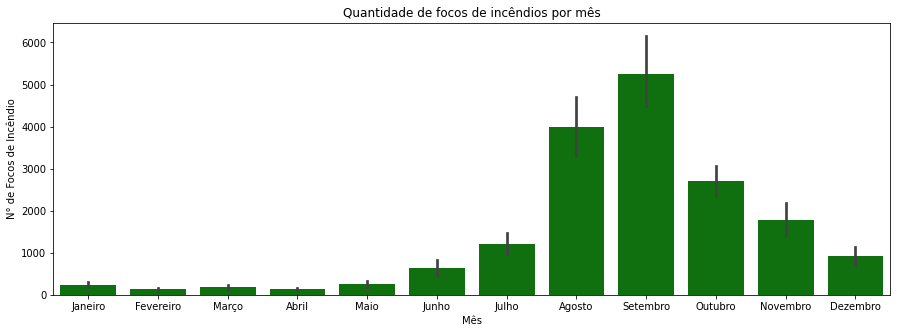

In [ ]:
#plot
plt.figure(figsize=(15,5))
sns.barplot(data = queimadas, x = 'month',y ='focos', color = 'green')

#label
plt.xlabel('Mês')
plt.ylabel('N° de Focos de Incêndio')
plt.title('Quantidade de focos de incêndios por mês')

plt.show()

É fácil perceber que essa sazionalidade é diretamente relacionada com o clima seco provocado pela chegada do inverno brasileiro, em junho. O pico do número de queimadas é o mês de setembro, caindo gradativamente, até o início das chuvas de verão. Embora esse fato seja óbvio, isso pode nos fazer pensar que as queimadas ocorrem, em geral, por causas naturais, embora seja sabido que no ramo da agropecuária, as queimadas sejam utilizadas para remover a mata que será destinada no negócio.

Pensando nisso, a seguir faremos um comparativo entre o número de incêndios e a área total desmatada, pois, nesse caso, o desmatamento é sim provocado intencionalmente.

## 3. Comparação entre os dados
**Queimadas Vs Desmatamento**

Embora queimadas sejam mais propicias em períodos de seca, a seca tende a ocorrer com o desmatamento. Na publicação _De que modo o El Nino influência a Amazônia? Um experimento de exclusão de chuva_, é abordado a importância da floresta para manutenção da chuva:
> As grandes conversões de áreas de floresta em áreas de pastagem também contribuem para o aumento da seca na região. Salite et ai. (1979) concluiu que a maioria da chuva na Amazônia é reciclada segundo o ciclo: precipitação-solo-atmosfera-precipitação. Deste modo a evapotranspiração tem um importante papel neste ciclo, sendo responsável por cerca de 60% da precipitação na região.
>
> Moreira et ai. (1997) indicam que vapor do ambiente da floresta é na maioria,
mas não completamente, gerado pela transpiração das plantas.[...]
>
> Desde modo, [...] o desmatamento pode levar a uma
redução significativa das chuvas na região.

De fato, veremos a seguir a relação entre a área desmatada e o número de incêndios ao longo dos anos.

###3.1 Manipulação dos Dados
Primeiro, é necessário unirmos os nossos dois conjuntos de dados.

In [ ]:
amazonia = pd.merge(desmatamento,queimadas.groupby(['year', 'state']).sum().reset_index(col_fill=['year', 'state']),
                    on=['year','state']).drop(columns={'pct_change'})
#amazonia = gpd.GeoDataFrame(amazonia)

amazonia['focos'] = amazonia['focos'].astype('float')
amazonia['area'] = amazonia['area'].astype('float')
amazonia['year'] = amazonia['year'].astype('float')
amazonia['year'] = amazonia['year'].astype('Int32')

In [ ]:
amazonia.head(2)

,year,area,state,geometry,sigla,focos
0,1998,2041.0,RONDONIA,"MULTIPOLYGON (((-62.79892 -8.02312, -62.78622 ...",RO,6925.0
1,1999,2358.0,RONDONIA,"MULTIPOLYGON (((-62.79892 -8.02312, -62.78622 ...",RO,7122.0


###3.2 Visualização

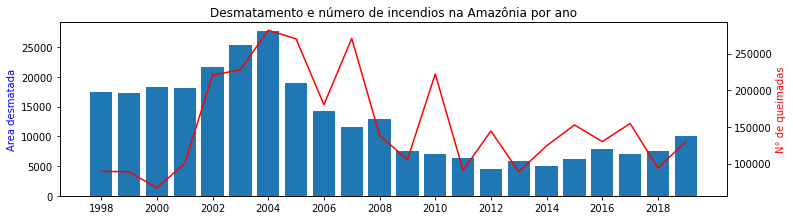

In [ ]:
#dados agregados por ano
amazonia_agreg = amazonia.groupby(['year']).sum().reset_index(col_fill='year')

#subplots
fig, ax1 = plt.subplots(sharex=True, figsize=(10, 3))
fig.tight_layout()

#plot1
ax1.bar(amazonia_agreg['year'],amazonia_agreg['area'])
ax1.set_ylabel('Area desmatada',color='blue')

#plot2
ax2 = ax1.twinx()
ax2.plot(amazonia_agreg['year'],amazonia_agreg['focos'], 'r')
ax2.set_ylabel('N° de queimadas', color ='r')

#labels
plt.xlabel('Ano')
plt.xticks(range(1998,2020,2))
plt.title('Desmatamento e número de incendios na Amazônia por ano')

plt.show()

Podemos observar a partir do gráfico acima que as duas séries estão bem próximas em suas variações. Além disso, é interessante como o número de queimadas parece se ajustar melhor à area desmatada quando a olhamos como um efeito atrasado do deflorestamento.

A seguir, vemos que a correlação enrte as duas séries é de quase 0.8, estando altamente correlacionadas. Além disso, podemos observar o gráfico de dispersão, e como a reta de ajuste da regressão linear é positivamente inclinada.

           area     focos
area   1.000000  0.772298
focos  0.772298  1.000000


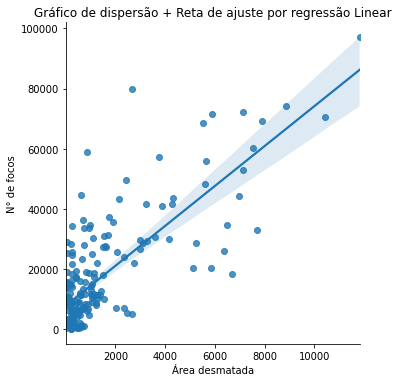

In [ ]:
#correlação entre as séries
print(amazonia.loc[:,['area','focos']].corr())

#scatterplot + reta da regressão
sns.lmplot(data = amazonia, x='area', y='focos')
plt.title('Gráfico de dispersão + Reta de ajuste por regressão Linear')
plt.xlabel("Área desmatada")
plt.ylabel('N° de focos')

plt.show()

#4. Conclusões
Sabemos que as principais causas do desmatamento na Amazônia Legal é a conversão de florestas para uso na agropecuária. Vimos também que alguns aumentos repentinos foram provocados pela expansão desse negócio, desvalorização da terra, aumento da demanda, e também podendo estar associado indiretamente a exploração da madeira. Além disso, a tendência recente no aumento da área deflorestada anualmente está mais relacionada ao relaxamento de políticas de defesa da amazônia, posicionamento de líderes e medidas adotadas que também levam a esse pensamento.

Embora em termos absolutos, a área desmatada por ano não supera alguns anos anteriores, a proporção da área deflorestada em relação ao que resta da Amazônia Legal é o que nos preocupa. O Brasil já foi reconhecido por seus avanços na contenção da exploração dessa região, mas a tendência crescente nos últimos anos requerem medidas.

Além disso, a descentralização de "onde o desmatamento está ocorrendo" ocorre principalmente pela consolidação da agropecuária em regiões que já foram altamente exploradas.

As queimadas, apesar de estarem muito suscetiveis à sazionalidade, como período de chuvas e estações do ano, mostra ter uma causalidade direta com o desmatamento, mas como um efeito de médio/longo prazo. Além disso, o número de queimadas costuma ser maior em estados com maior área territorial sugerindo que, em geral, as consequências do desmatamento, clima seco e estiagem são igualmente sentidas por diferentes regiões.

É possível ainda dizer que embora seja uma pratica conhecida, a remoção da mata através de queimadas controladas para uso posterior na agropecuária não aparenta ser um número significativo no número total de focos de incêndio.

#5. Referências Bibliográficas

BRUNO FÁVERO; AMANDA RIBEIRO. O que realmente se sabe sobre as queimadas no Brasil. Aos Fatos, 23 ago. 2019. Disponível em: https://www.aosfatos.org/noticias/o-que-realmente-se-sabe-sobre-queimadas-no-brasil/. Acesso em: 27 nov. 2020.

CLÁUDIO ANGELO. Amazônia deve ter recorde de queimadas. Observatório do Clima, 30 jun. 2016. Disponível em: https://www.aosfatos.org/noticias/o-que-realmente-se-sabe-sobre-queimadas-no-brasil/. Acesso em: 25 nov. 2020.

MATHEUS MOREIRA; PHILLIPPE WATANABE. Desmatamento na Amazônia bate recorde e cresce 29,5% em 12 meses. Folha de São Paulo, 18 nov. 2019. Disponível em: https://www1.folha.uol.com.br/ambiente/2019/11/desmatamento-na-amazonia-bate-recorde-e-cresce-295-em-12-meses.shtml. Acesso em: 27 nov. 2020.

MINISTÉRIO DA AGRICULTURA, PECUÁRIA E ABASTECIMENTO . CARDINOT, G.; NEPSTAD, D. C; MOUTINHO, P.; DIAS FILHO, M.; DAVIDSON, E.; VIANA, N. De que modo o el niño influência a Amazônia? um experimento de exclusão de chuva. In: CONGRESSO NACIONAL DE BOTÂNICA. Brasília, DF: [s. n.], 2000. p. 147-151. Disponível em: https://www.embrapa.br/busca-de-publicacoes/-/publicacao/986018/de-que-modo-o-el-nino-influencia-a-amazonia-um-experimento-de-exclusao-de-chuva. Acesso em: 26 nov. 2020.

MINISTÉRIO DA CIÊNCIA E TECNOLOGIA. INPE. Deflorestamento Amazônia 1995-1997. Disponível em: http://www.obt.inpe.br/OBT/assuntos/programas/amazonia/prodes/pdfs/prodes1995-1997.pdf. Acesso em: 26 nov. 2020.
